# Intro
The Breast Cancer Wisconsin (Diagnostic) Data Set was obtained from Kaggle/UCI Machine Learning Repository (https://www.kaggle.com/uciml/breast-cancer-wisconsin-data). Cell parameters such as average size, texture, and compactness were documented based on patient samples. The outcome was the tumor classification as Benign or Malignant.

Logistic regression, decision tree, k-nearest neighbors, SVM, and ensemble methods random forest and AdaBoost were used for classification of breast cancer data as malignant or benign. Hyperparameter tuning with grid search was used to optimize the parameters for each.

The classifiers behaved very similarly and all achieved maximum test accuracies between 94-100% and miminum accuracies of around 90%.

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Preprocessing
from sklearn.preprocessing import PowerTransformer

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

# Ensemble
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier

# PCA
from sklearn.decomposition import PCA

# Exploratory data analysis
The data was examined and overall looked in good shape, except needed to remove id as a predictor, get rid of the extra "Unnamed: 32" column, and change diagnosis to category type.

In [2]:
# Load data
data = pd.read_csv("breast_cancer_data.csv")

# Examine data
data.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [3]:
# Examine data (cont.)
data.dtypes # All floats except diagnosis is an object
data['diagnosis'] = data['diagnosis'].astype('category')
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [4]:
# Split data into relevant predictors and outcomes
X = data.drop(["id", "diagnosis", "Unnamed: 32"], axis=1)
y = data["diagnosis"]
data = pd.concat([y.reset_index(drop=True), X.reset_index(drop=True)],axis=1)

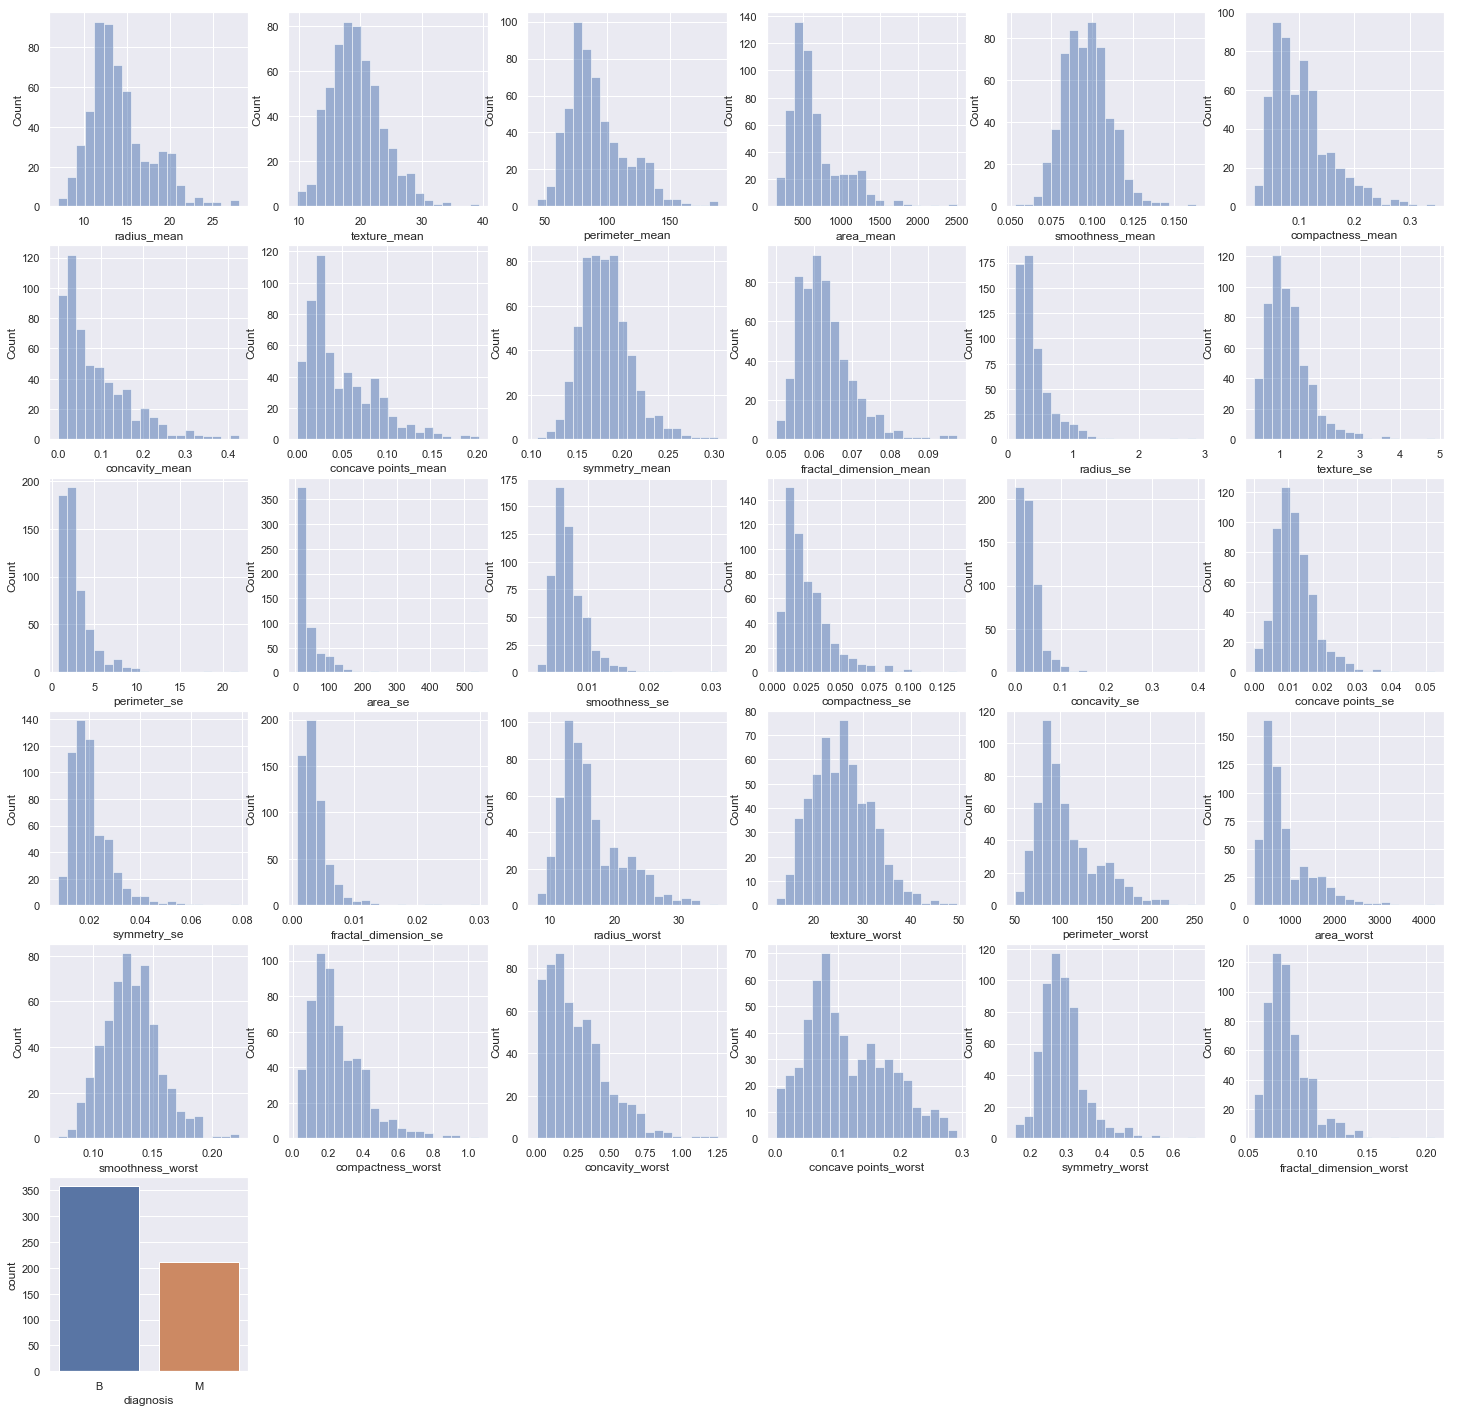

In [5]:
# Examine distribution of variables
sns.set(rc={'figure.figsize':(25,25)})
for i in range (1, 31):
    plt.subplot(6, 6, i)
    plt.hist(X.iloc[:, i-1], bins = 20, alpha=0.5)
    plt.xlabel(X.columns[i-1])
    plt.ylabel('Count')
                 
plt.subplot(6, 6, 31)
sns.countplot(y)

Correlations were examined and some variables removed to reduce multicollinearity and potential overfitting.

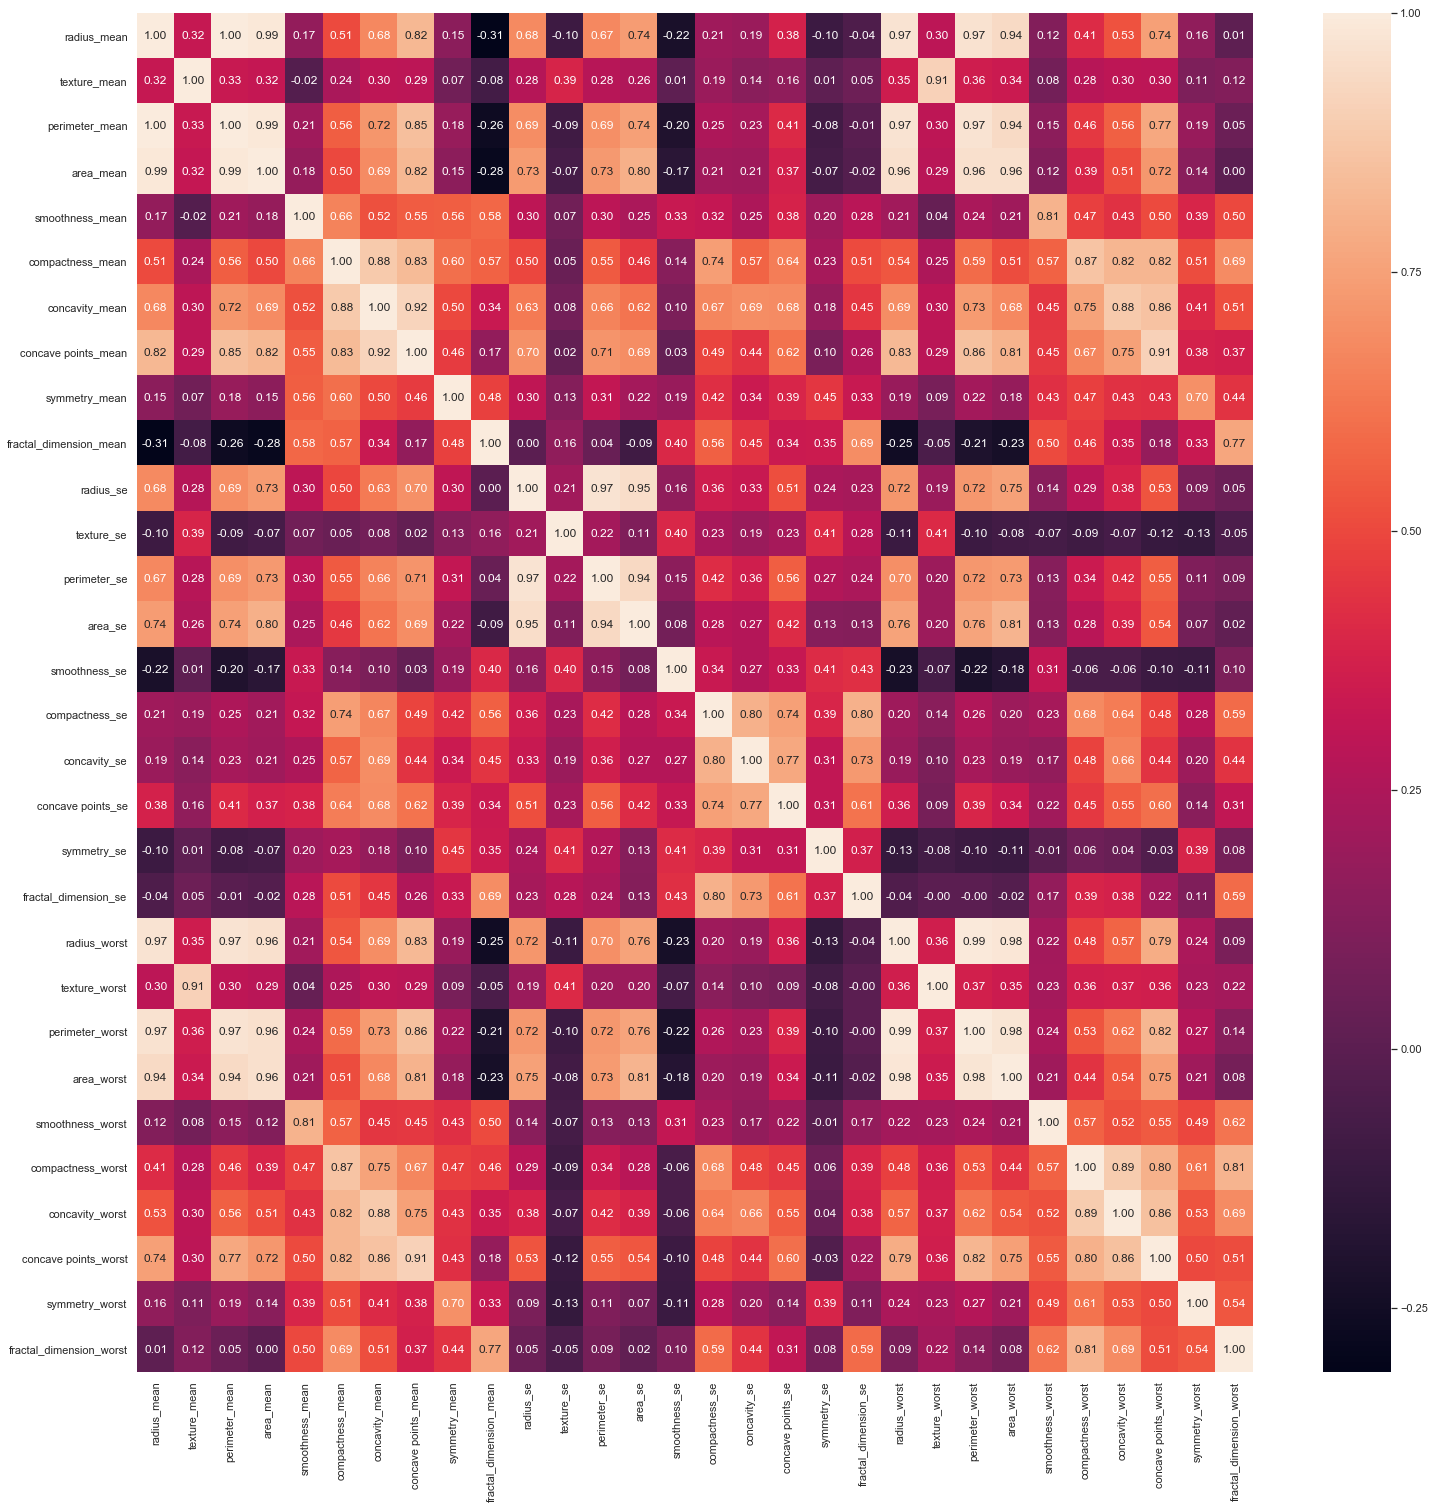

In [6]:
# Examine correlations between variables
corr = X.corr()
sns.heatmap(corr, xticklabels=X.columns, yticklabels=X.columns, annot=True, fmt='.2f')

# 4 sets of highly correlated variables:
# radius_mean, perimeter_mean, area_mean, radius_worst, perimeter_worst, and area_worst
# compactness_mean, concavity_mean, concave points_mean, compactness_worst, concavity_worst, and concave points_worst
# radius_se, perimeter_se, and area_se
# texture_mean and texture_worst

# Make new reduced predictor dataframe with just one from each set (30 predictors -> 17 predictors)
X_red = X.drop(["perimeter_mean", "area_mean", "radius_worst", "perimeter_worst", "area_worst", 
                   "compactness_mean", "concave points_mean", "compactness_worst", "concavity_worst", "concave points_worst",
                   "perimeter_se", "area_se",
                   "texture_worst"], axis=1)
X_red.head()
data_red = pd.concat([y.reset_index(drop=True), X_red.reset_index(drop=True)],axis=1)

Diagnosis was plotted vs. each variable pairwise to see if there were any features that are particularly useful for diagnostics. Malignant tumors generally had larger mean radiuses and higher concavity.

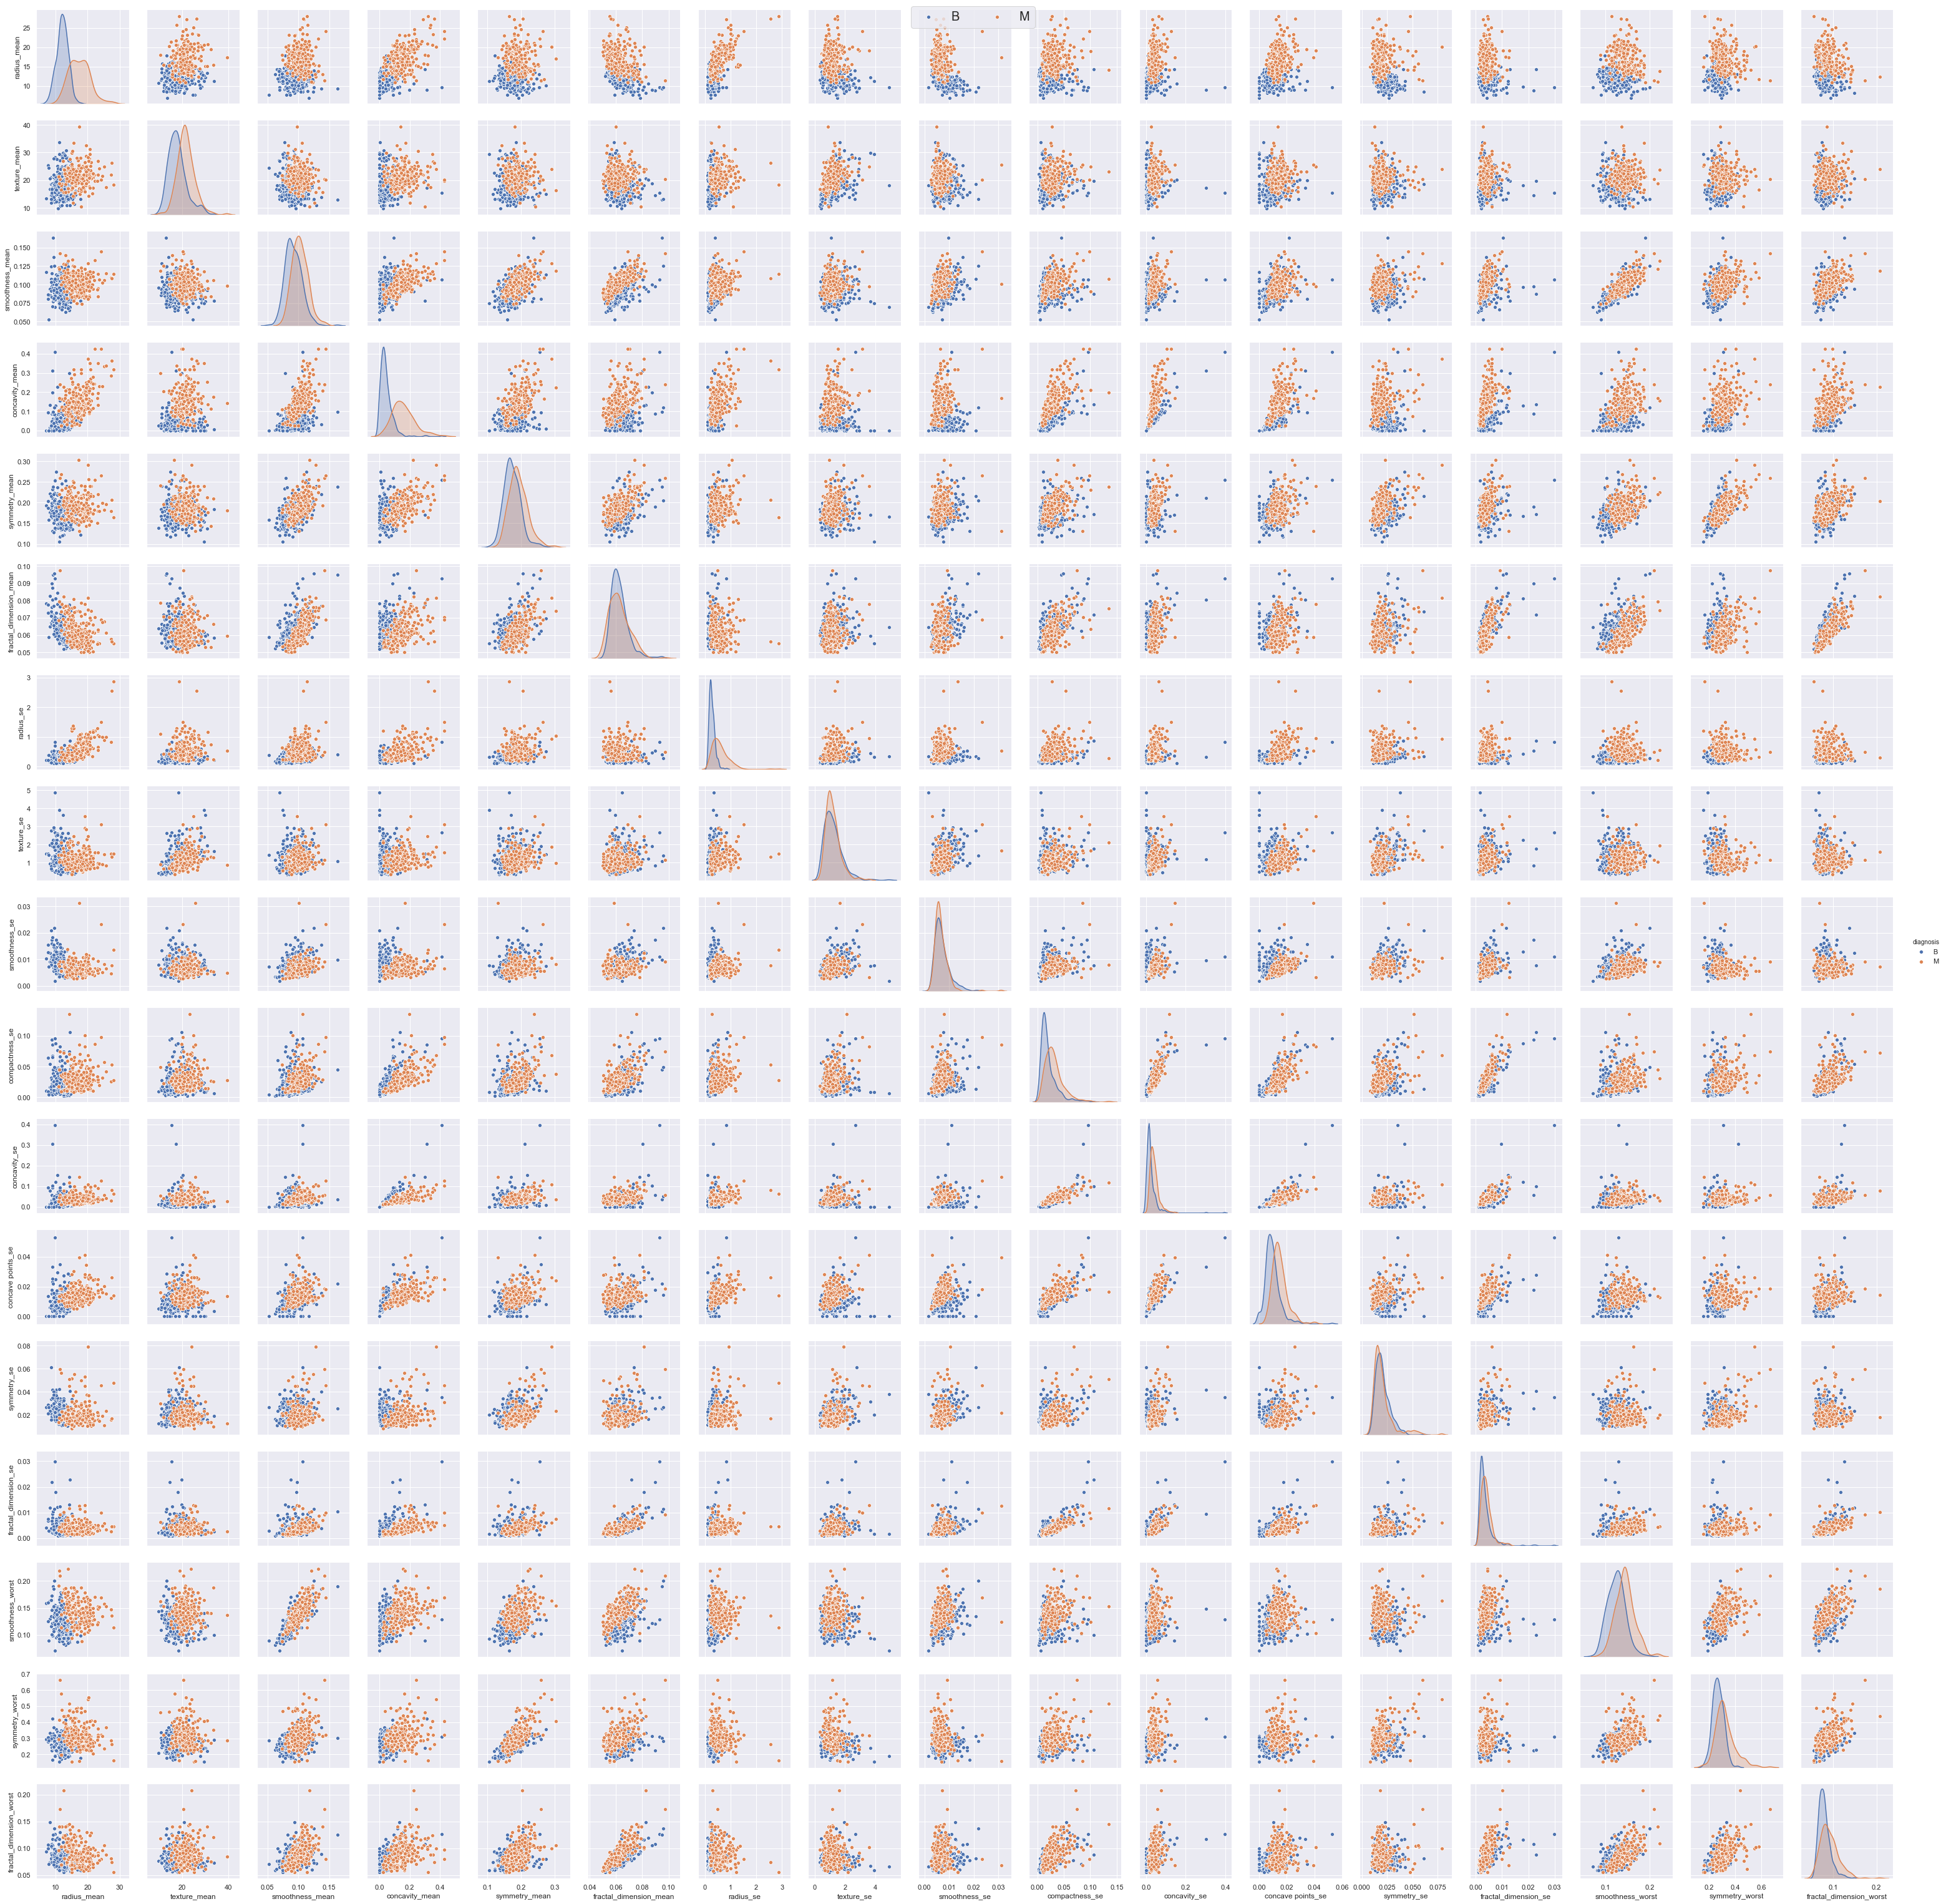

In [45]:
# Pairwise scatter plot for remaining 17 predictors
g = sns.pairplot(data=data_red, hue="diagnosis")
handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=2, prop={'size': 20})

# Remove outliers and transform and scale data
Outliers from both original and reduced datasets were removed. In addition, a further power transformation was performed on the reduced dataset. (Centering and scaling needed for SVM, for example.)

In [8]:
# Compute z-score for both original X_train and reduced X_red sets of predictors
z = np.abs(stats.zscore(X))
z_red = np.abs(stats.zscore(X_red))

# Remove outliers where z-score >= 3
threshold = 3
data_no_outliers = data[(z<threshold).all(axis=1)]
data_red_no_outliers = data_red[(z_red<threshold).all(axis=1)]
X_no_outliers = data_no_outliers.drop(["diagnosis"], axis=1)
y_no_outliers = data_no_outliers["diagnosis"]
X_red_no_outliers = data_red_no_outliers.drop(["diagnosis"], axis=1)
y_red_no_outliers = data_red_no_outliers["diagnosis"]

# Examine how many rows were removed
print(data.shape) # 569 x 31
print(data_no_outliers.shape) # 495 x 31 => 74 rows removed

print(data_red.shape) # 569 x 18
print(data_red_no_outliers.shape) # 506 x 18 => 63 rows removed

(569, 31)
(495, 31)
(569, 18)
(506, 18)


In [9]:
# Power transform predictors (transforms and standardizes together)
power_transformer = PowerTransformer(method='box-cox', standardize=True)
X_no_outliers_tf = power_transformer.fit_transform(X_no_outliers+0.01)
X_red_no_outliers_tf = power_transformer.fit_transform(X_red_no_outliers+0.01)

X_no_outliers_tf = pd.DataFrame(data=X_no_outliers_tf, columns=X_no_outliers.columns)
X_red_no_outliers_tf = pd.DataFrame(data=X_red_no_outliers_tf, columns=X_red_no_outliers.columns)

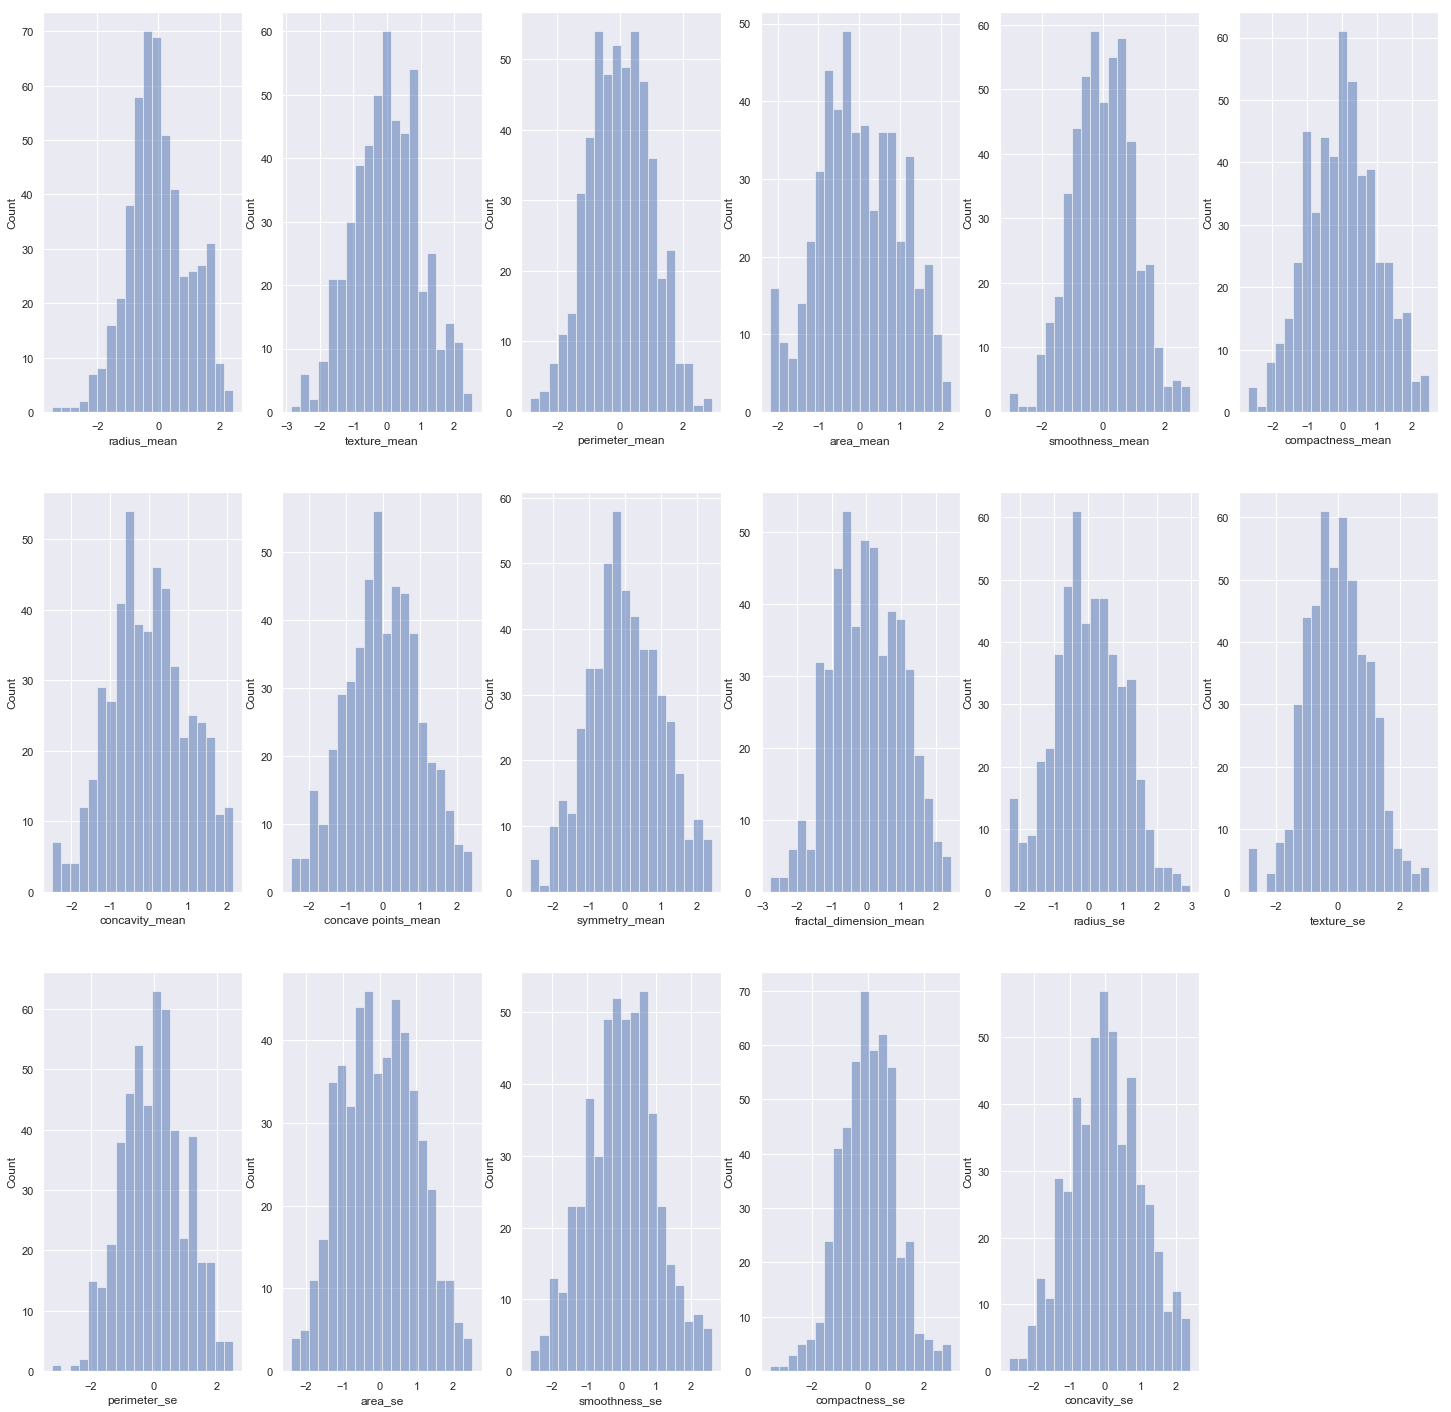

In [10]:
# Examine distribution of predictors once more
for i in range (1, 18):
    plt.subplot(3, 6, i)
    plt.hist(X_red_no_outliers_tf.iloc[:, i-1], bins = 20, alpha=0.5)
    plt.ylabel('Count')
    plt.xlabel(X.columns[i-1])
plt.show()

# Split data into train and test sets

We will be comparing 5 datasets:
1. Original dataset
2. Original dataset with outliers removed
3. Original dataset with outliers removed and power transformed
4. Reduced dataset with outliers removed
5. Reduced dataset with outliers removed and power transformed

In [11]:
# Name the datasets
datasets = ['Original', 'Outliers removed', 'Outliers removed + power transform', 'Reduced + outliers removed',
            'Reduced + outliers removed + power transform']

# Split data into train and test sets for each
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size = 0.2, random_state=23, stratify=y)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_no_outliers, y_no_outliers, test_size = 0.2, random_state=23, stratify=y_no_outliers)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_red_no_outliers, y_red_no_outliers, test_size = 0.2, random_state=23, stratify=y_red_no_outliers)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_no_outliers_tf, y_no_outliers, test_size = 0.2, random_state=23, stratify=y_no_outliers)
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_red_no_outliers_tf, y_red_no_outliers, test_size = 0.2, random_state=23, stratify=y_red_no_outliers)

# Make arrays for each
X_train_all = [X_train_1, X_train_2, X_train_3, X_train_4, X_train_5]
X_test_all = [X_test_1, X_test_2, X_test_3, X_test_4, X_test_5]
y_train_all = [y_train_1, y_train_2, y_train_3, y_train_4, y_train_5]
y_test_all = [y_test_1, y_test_2, y_test_3, y_test_4, y_test_5]

# Classification
Logistic regression, k-nearest neighbors, SVM, and decision tree classifiers were compared, along with ensemble methods random forest and adaboost.

In [22]:
# Seed for random states
seed = 23

# Instantiate logistic regression and parameters to tune
lr = LogisticRegression(solver='newton-cg', random_state=seed)
lr_par= {'C': [0.2, 0.5, 1, 5]}

# Instantiate k-nearest neighbors and parameters to tune
knn = KNeighborsClassifier()
knn_par= {'n_neighbors':[2, 3, 4, 5]}

# Instantiate SVM and parameters to tune
sv = svm.SVC(gamma='auto', random_state=seed)
sv_par = {'C': [1, 2]}

# Instantiate decision tree and parameters to tune
dt = DecisionTreeClassifier(random_state=seed)
dt_par = {'min_samples_split': [2, 5, 10], 'min_samples_leaf': [2, 5, 10]}

# Instantiate random forest and parameters to tune
rf = RandomForestClassifier(n_estimators=10, random_state=seed)
rf_par = {'min_samples_split': [2, 5, 10], 'min_samples_leaf': [2, 5, 10], 'criterion': ['gini', 'entropy']}

ada = AdaBoostClassifier(random_state=seed)
ada_par = {'n_estimators':[5, 10, 20, 25, 50], 'learning_rate':[0.1, 0.5, 1.0], 'algorithm':['SAMME.R', 'SAMME']}

# Define the list of classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('SVM', sv),
               ('Decision Tree', dt), ('Random Forest', rf), ('AdaBoost', ada)]
parameters = [lr_par, knn_par, sv_par, dt_par, rf_par, ada_par]

Hyperparameter tuning with grid search and 5-fold cross-validation was used to optimize the parameters for each.

In [13]:
# Instantiate arrays for accuracies for all datasets
train_acc_mean = np.empty(len(classifiers)*len(datasets))
train_acc_sd = np.empty(len(classifiers)*len(datasets))
test_accuracy = np.empty(len(classifiers)*len(datasets))
grid_params = []

# Fit over the list of classifiers with GridSearch and 5-fold cross-validation
for i, (clf_name, clf) in enumerate(classifiers):
 
    for i_data, d in enumerate(datasets):
        ## Fit for dataset d
        # Use GridSearch and fit clf to the training set
        clf_cv = GridSearchCV(clf, parameters[i], cv=5, iid=False)
        clf_cv.fit(X_train_all[i_data], y_train_all[i_data])

        # Store tuned parameters
        grid_params.append(clf_cv.best_params_)

        # Calculate and store accuracies
        train_acc_mean = clf_cv.cv_results_['mean_test_score']
        train_acc_sd = clf_cv.cv_results_['std_test_score']
        test_accuracy[i*len(datasets)+i_data] = accuracy_score(y_test_all[i_data], 
                                                               clf_cv.predict(X_test_all[i_data]))

In [14]:
## Print accuracies
# Rearrange into dataframe
train_acc_df = pd.DataFrame(train_acc_mean.reshape(-1, len(classifiers)), columns=[clf_name for (clf_name, clf) in classifiers], index=datasets)
train_sd_df = pd.DataFrame(train_acc_sd.reshape(-1, len(classifiers)), columns=[clf_name for (clf_name, clf) in classifiers], index=datasets)
test_acc_df = pd.DataFrame(test_accuracy.reshape(-1, len(classifiers)), columns=[clf_name for (clf_name, clf) in classifiers], index=datasets)

# Print training accuracies
print('Training data accuracies')
train_acc_df

Training data accuracies


Logistic Regression  \
Original                                                 0.893549   
Outliers removed                                         0.938086   
Outliers removed + power transform                       0.933148   
Reduced + outliers removed                               0.920772   
Reduced + outliers removed + power transform             0.945494   

                                              K Nearest Neighbours       SVM  \
Original                                                  0.901019  0.913302   
Outliers removed                                          0.943056  0.935617   
Outliers removed + power transform                        0.933179  0.943056   
Reduced + outliers removed                                0.920741  0.923241   
Reduced + outliers removed + power transform              0.910926  0.920772   

                                              Decision Tree  Random Forest  \
Original                                           0.925741       0.938086   
Outliers removed                                   0.945463       0.898580   
Outliers removed + power transform                 0.893549       0.903488   
Reduced + outliers removed                         0.933086       0.933117   
Reduced + outliers removed + power transform       0.933117       0.930679   

                                              AdaBoost  
Original                                      0.918302  
Outliers removed                              0.923210  
Outliers removed + power transform            0.920772  
Reduced + outliers removed                    0.935617  
Reduced + outliers removed + power transform  0.945463

In [15]:
# Print test accuracies
print('Test data accuracies')
test_acc_df

Test data accuracies


Logistic Regression  \
Original                                                 0.938596   
Outliers removed                                         0.939394   
Outliers removed + power transform                       0.941176   
Reduced + outliers removed                               0.919192   
Reduced + outliers removed + power transform             0.941176   

                                              K Nearest Neighbours       SVM  \
Original                                                  0.959596  0.960784   
Outliers removed                                          0.911765  0.959596   
Outliers removed + power transform                        0.989899  0.950980   
Reduced + outliers removed                                0.901961  0.938596   
Reduced + outliers removed + power transform              0.973684  0.989899   

                                              Decision Tree  Random Forest  \
Original                                           1.000000       0.970588   
Outliers removed                                   0.901961       0.631579   
Outliers removed + power transform                 0.947368       0.919192   
Reduced + outliers removed                         0.919192       0.941176   
Reduced + outliers removed + power transform       0.960784       0.989899   

                                              AdaBoost  
Original                                      0.912281  
Outliers removed                              0.666667  
Outliers removed + power transform            0.901961  
Reduced + outliers removed                    0.919192  
Reduced + outliers removed + power transform  0.960784

In [16]:
# Reorganize training and test data accuracies from wide to long format
# Reset index so datasets are first column
train_acc_df.index.name = "Dataset"
train_sd_df.index.name = "Dataset"
test_acc_df.index.name = "Dataset"

train_acc_df_long = train_acc_df.reset_index()
train_sd_df_long = train_sd_df.reset_index()
test_acc_df_long = test_acc_df.reset_index()

# Melt dataframes into long format
train_acc_df_long = pd.melt(train_acc_df_long, id_vars=['Dataset'], var_name='Classifier', value_name='Accuracy')
train_sd_df_long = pd.melt(train_sd_df_long, id_vars=['Dataset'], var_name='Classifier', value_name='Std. Dev.')
train_acc_df_long = train_acc_df_long.combine_first(train_sd_df_long) # Merge mean and sd into one dataframe
train_acc_df_long = train_acc_df_long[['Dataset', 'Classifier', 'Accuracy', 'Std. Dev.']] # Reorder columns after merge
test_acc_df_long=pd.melt(test_acc_df_long, id_vars=['Dataset'], var_name='Classifier', value_name='Accuracy')

# Check dataframe organization
train_acc_df_long.head()

Dataset           Classifier  \
0                                      Original  Logistic Regression   
1                              Outliers removed  Logistic Regression   
2            Outliers removed + power transform  Logistic Regression   
3                    Reduced + outliers removed  Logistic Regression   
4  Reduced + outliers removed + power transform  Logistic Regression   

   Accuracy  Std. Dev.  
0  0.893549   0.025481  
1  0.938086   0.015766  
2  0.933148   0.030886  
3  0.920772   0.012724  
4  0.945494   0.029959

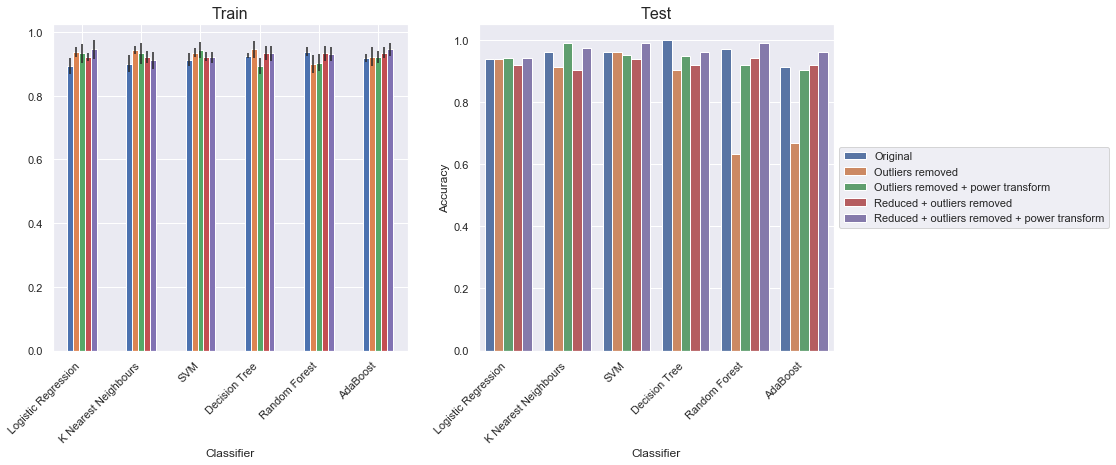

In [47]:
# Create bar plots of training and test data accuracies
sns.set(rc={'figure.figsize':(14,6)})
f, axes = plt.subplots(1, 2)

# Training accuracies
train_acc_df_long_grouped = train_acc_df_long.groupby(['Classifier', 'Dataset'])['Accuracy'].mean()
train_sd_df_long_grouped = train_sd_df_long.groupby(['Classifier', 'Dataset'])['Std. Dev.'].mean()
train_acc_grouped = train_acc_df_long_grouped.unstack().reindex([clf_name for (clf_name, clf) in classifiers])
train_sd_grouped = train_sd_df_long_grouped.unstack().reindex([clf_name for (clf_name, clf) in classifiers])
g1 = train_acc_grouped.plot(kind="bar", yerr=train_sd_grouped, ax=axes[0])
g1.set_xticklabels(g1.get_xticklabels(), rotation=45, ha="right")
g1.set_title('Train', fontsize=16)
g1.legend().remove()

# Test accuracies
g2 = sns.barplot(x="Classifier", y="Accuracy", hue="Dataset", data=test_acc_df_long, ax=axes[1])
g2.set_xticklabels(g2.get_xticklabels(), rotation=45, ha="right")
g2.set_title('Test', fontsize=16)
g2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Text(0.5, 1.0, 'Test Accuracies by Dataset')

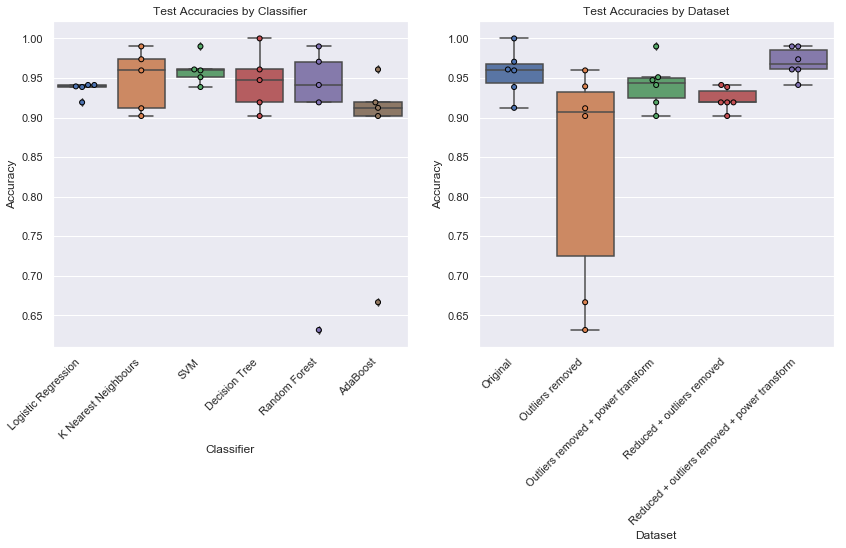

In [49]:
# Examine which method and which dataset were consistently better
f, axes = plt.subplots(1, 2)

# Boxplot of test accuracies with respect to method
g1 = sns.boxplot(x='Classifier', y='Accuracy', data=test_acc_df_long, ax=axes[0])
g1 = sns.swarmplot(x='Classifier', y='Accuracy', data=test_acc_df_long, ax=axes[0],
                   dodge=True, edgecolor='black', linewidth=1)
g1.set_xticklabels(g1.get_xticklabels(), rotation=45, ha="right")
g1.set_ylabel('Accuracy')
g1.set_title('Test Accuracies by Classifier')

# Boxplot of test accuracies with respect to dataset
g2 = sns.boxplot(x='Dataset', y='Accuracy', data=test_acc_df_long, ax=axes[1])
g2 = sns.swarmplot(x='Dataset', y='Accuracy', data=test_acc_df_long, ax=axes[1],
                   dodge=True, edgecolor='black', linewidth=1)
g2.set_xticklabels(g2.get_xticklabels(), rotation=45, ha="right")
g2.set_ylabel('Accuracy')
g2.set_title('Test Accuracies by Dataset')

# Examine precision and recall
For cancer detection, we probably would like to err on the side of caution and try to detect as many malignant tumors as possible (reduced false negatives and allow for a larger margin of error for false positives).

We focus here with using an SVM classifier on the reduced + outliers removed + power transform dataset, which had 99% accuracy on the test dataset.

              precision    recall  f1-score   support

           B       0.97      0.96      0.96        67
           M       0.92      0.94      0.93        35

   micro avg       0.95      0.95      0.95       102
   macro avg       0.94      0.95      0.95       102
weighted avg       0.95      0.95      0.95       102



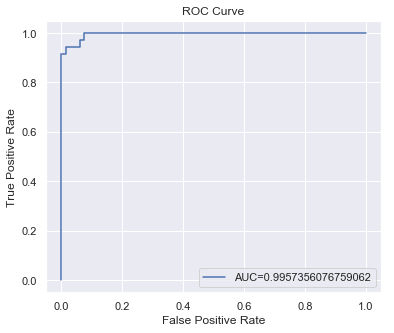

In [25]:
# Fit dataset 5 with SVM classifier
sv = svm.SVC(gamma='auto', C=2, random_state=seed, probability=True)
sv.fit(X_train_all[4], y_train_all[4])

# Examine classification report for SVM fit
print(classification_report(y_test_all[4], sv.predict(X_test_all[4]))) # Recall = 0.94

# Create ROC curve
y_pred_proba = sv.predict_proba(X_test_all[4])[::,1]
fpr, tpr, _ = roc_curve(y_test_all[4].cat.codes, y_pred_proba)
auc = roc_auc_score(y_test_all[4].cat.codes, y_pred_proba)

sns.set(rc={'figure.figsize':(6,5)})
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()
    
# Precision tp / (tp + fp); not label positive a sample that is negative
# Recall tp / (tp + fn); find all positive
# F1-score 2*precision*recall/(precision+recall)

Accuracy was sacrificed in order to account for all malignant tumors.

In [43]:
# Change probability cut-off for determining malignancy
y_predict = pd.DataFrame(sv.predict_proba(X_test_all[4])[:,1], # 35% instead of 50%
                         columns=['prediction'])['prediction'].apply(lambda x: 'B' if x<0.35 else 'M')
print(classification_report(y_test_all[4], y_predict)) # Recall = 1
print(accuracy_score(y_test_all[4], y_predict)) # Accuracy = 95%

              precision    recall  f1-score   support

           B       1.00      0.93      0.96        67
           M       0.88      1.00      0.93        35

   micro avg       0.95      0.95      0.95       102
   macro avg       0.94      0.96      0.95       102
weighted avg       0.96      0.95      0.95       102

0.9509803921568627


Final distribution of predicted classfications vs. true classifications of test dataset was graphed for visualization.

Text(0.5, 1.0, 'Final Classification')

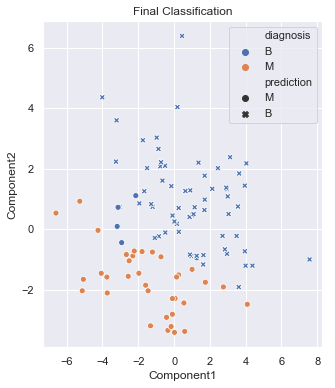

In [44]:
# PCA with 2 components
pca = PCA(n_components=2)

# Visualization of final classifier using PCA
pca_final = pca.fit_transform(X_test_all[4])
pca_final_df = pd.DataFrame(pca_final, columns=['Component1','Component2'])

# Concatenate predicted and true diagnoses to PCA results
pca_final_df = pd.concat([y_test_all[4].reset_index(drop=True), y_predict, pca_final_df], axis=1)

# Generate PCA results plot
sns.set(rc={'figure.figsize':(5,6)})
sns.scatterplot(x="Component1", y="Component2", hue="diagnosis", style="prediction", data=pca_final_df)
plt.title('Final Classification')

# Conclusions
+ Overall, the classifiers achieve very similar results
+ SVM classifier consistently achieved over 94% accuracy on test dataset
+ Two instances of 100% accuracy
    + Decision tree with original data
+ Would move forward with models with most consistent high performance
    + Classifier: SVM
    + Dataset: Reduced + outliers removed + power transform
+ Sacrificing accuracy to achieve 100% recall (want to treat as many patients that need it as possible), we were still able to obtain 95% accuracy overall

Future considerations:
+ Correct for imbalance of malignant and benign tumors
+ Further optimize parameters

In [42]:
# Change dataframe to wide format for value comparisons
test_acc_df_wide = pd.pivot(test_acc_df_long, index='Classifier', columns='Dataset', values='Accuracy')
test_acc_df_wide

Dataset               Original  Outliers removed  \
Classifier                                         
AdaBoost              0.912281          0.666667   
Decision Tree         1.000000          0.901961   
K Nearest Neighbours  0.959596          0.911765   
Logistic Regression   0.938596          0.939394   
Random Forest         0.970588          0.631579   
SVM                   0.960784          0.959596   

Dataset               Outliers removed + power transform  \
Classifier                                                 
AdaBoost                                        0.901961   
Decision Tree                                   0.947368   
K Nearest Neighbours                            0.989899   
Logistic Regression                             0.941176   
Random Forest                                   0.919192   
SVM                                             0.950980   

Dataset               Reduced + outliers removed  \
Classifier                                         
AdaBoost                                0.919192   
Decision Tree                           0.919192   
K Nearest Neighbours                    0.901961   
Logistic Regression                     0.919192   
Random Forest                           0.941176   
SVM                                     0.938596   

Dataset               Reduced + outliers removed + power transform  
Classifier                                                          
AdaBoost                                                  0.960784  
Decision Tree                                             0.960784  
K Nearest Neighbours                                      0.973684  
Logistic Regression                                       0.941176  
Random Forest                                             0.989899  
SVM                                                       0.989899